# –ö–ª–∞—Å–∏—Ñ—ñ–∫–∞—Ü—ñ—è Fashion MNIST –∑ –≤–∏–∫–æ—Ä–∏—Å—Ç–∞–Ω–Ω—è–º VGG16

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
from keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


===========================
# 1. –ó–∞–≤–∞–Ω—Ç–∞–∂–µ–Ω–Ω—è —Ç–∞ –ø—ñ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–∏—Ö
===========================


In [5]:

# –ó–∞–≤–∞–Ω—Ç–∞–∂–µ–Ω–Ω—è –¥–∞–Ω–∏—Ö Fashion MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# –†–æ–∑–¥—ñ–ª–µ–Ω–Ω—è –≤–∞–ª—ñ–¥–∞—Ü—ñ–π–Ω–æ—ó —á–∞—Å—Ç–∏–Ω–∏
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.1, random_state=42
)

# –§—É–Ω–∫—Ü—ñ—è –¥–ª—è –ø–µ—Ä–µ—Ç–≤–æ—Ä–µ–Ω–Ω—è grayscale -> RGB —Ç–∞ —Ä–µ—Å–∞–π–∑—É


def prepare_rgb_images(x):
    x = tf.expand_dims(x, -1)  # (n, 28, 28, 1)
    x = tf.image.resize(x, (48, 48))  # (n, 48, 48, 1)
    x = tf.image.grayscale_to_rgb(x)  # (n, 48, 48, 3)
    return x


x_train_rgb = prepare_rgb_images(x_train)
x_val_rgb = prepare_rgb_images(x_val)
x_test_rgb = prepare_rgb_images(x_test)

# –ù–æ—Ä–º–∞–ª—ñ–∑–∞—Ü—ñ—è —á–µ—Ä–µ–∑ preprocess_input (–≤—ñ–¥ VGG16)
x_train_rgb = preprocess_input(x_train_rgb)
x_val_rgb = preprocess_input(x_val_rgb)
x_test_rgb = preprocess_input(x_test_rgb)

# One-hot –∫–æ–¥—É–≤–∞–Ω–Ω—è –º—ñ—Ç–æ–∫
y_train_cat = to_categorical(y_train, 10)
y_val_cat = to_categorical(y_val, 10)
y_test_cat = to_categorical(y_test, 10)



2025-08-10 16:28:40.453788: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


===========================
# 2. –ü–æ–±—É–¥–æ–≤–∞ tf.data.Dataset
===========================


In [6]:

batch_size = 64
train_ds = (
    tf.data.Dataset.from_tensor_slices((x_train_rgb, y_train_cat))
    .shuffle(1000)
    .batch(batch_size)
    .prefetch(1)
)
val_ds = (
    tf.data.Dataset.from_tensor_slices((x_val_rgb, y_val_cat))
    .batch(batch_size)
    .prefetch(1)
)
test_ds = (
    tf.data.Dataset.from_tensor_slices((x_test_rgb, y_test_cat))
    .batch(batch_size)
    .prefetch(1)
)


===========================
# 3. –ü–æ–±—É–¥–æ–≤–∞ –º–æ–¥–µ–ª—ñ (VGG16 + top)
===========================

In [7]:
# –ë–∞–∑–æ–≤–∞ –º–æ–¥–µ–ª—å VGG16 –±–µ–∑ –≤–µ—Ä—Ö–Ω—å–æ–≥–æ –∫–ª–∞—Å–∏—Ñ—ñ–∫–∞—Ç–æ—Ä–∞
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(48, 48, 3))
base_model.trainable = False  # –∑–∞–º–æ—Ä–æ–∑–∏—Ç–∏ —à–∞—Ä–∏ VGG16

# –î–æ–¥–∞—î–º–æ –≤–ª–∞—Å–Ω—ñ —à–∞—Ä–∏ –ø–æ–≤–µ—Ä—Ö
x = base_model.output
x = layers.Flatten()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.2)(x)
predictions = layers.Dense(10, activation="softmax")(x)  # 10 –∫–ª–∞—Å—ñ–≤ –¥–ª—è –ø—Ä–∏–∫–ª–∞–¥—É


# –°—Ç–≤–æ—Ä—é—î–º–æ –º–æ–¥–µ–ª—å
model = models.Model(inputs=base_model.input, outputs=predictions)


# –ö–æ–º–ø—ñ–ª—è—Ü—ñ—è –º–æ–¥–µ–ª—ñ
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

===========================
# 4. –ù–∞–≤—á–∞–Ω–Ω—è –º–æ–¥–µ–ª—ñ
===========================

In [8]:
history = model.fit(train_ds, validation_data=val_ds, epochs=5)


Epoch 1/5
844/844 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 232s 273ms/step - accuracy: 0.5212 - loss: 4.8422 - val_accuracy: 0.7920 - val_loss: 0.9892
Epoch 2/5
844/844 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 230s 273ms/step - accuracy: 0.7538 - loss: 1.2075 - val_accuracy: 0.8142 - val_loss: 0.6952
Epoch 3/5
844/844 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 224s 265ms/step - accuracy: 0.7885 - loss: 0.7868 - val_accuracy: 0.8240 - val_loss: 0.5707
Epoch 4/5
844/844 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 222s 263ms/step - accuracy: 0.8083 - loss: 0.6222 - val_accuracy: 0.8342 - val_loss: 0.5143
Epoch 5/5
844/844 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 232s 275ms/step - accuracy: 0.8263 - loss: 0.5241 - val_accuracy: 0.8407 - val_loss: 0.4746


===========================
# 5. Fine-tuning (—Ä–æ–∑–º–æ—Ä–æ–∂–µ–Ω–Ω—è –æ—Å—Ç–∞–Ω–Ω—ñ—Ö —à–∞—Ä—ñ–≤ VGG)
===========================

In [9]:
base_model.trainable = True
for layer in base_model.layers[:-4]:
    layer.trainable = False

# –ü–æ–≤—Ç–æ—Ä–Ω–∞ –∫–æ–º–ø—ñ–ª—è—Ü—ñ—è –∑ –º–µ–Ω—à–æ—é —à–≤–∏–¥–∫—ñ—Å—Ç—é –Ω–∞–≤—á–∞–Ω–Ω—è
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

# –î–æ–¥–∞—Ç–∫–æ–≤–µ –Ω–∞–≤—á–∞–Ω–Ω—è
model.fit(train_ds, validation_data=val_ds, epochs=10)


# –ó–±–µ—Ä–µ–≥—Ç–∏ –º–æ–¥–µ–ª—å —É —Ñ–æ—Ä–º–∞—Ç—ñ Keras HDF5
model.save("vgg16_finetuned.h5")

print("‚úÖ –ú–æ–¥–µ–ª—å –∑–±–µ—Ä–µ–∂–µ–Ω–∞ —è–∫ vgg16_finetuned.h5")

Epoch 1/10
844/844 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 290s 342ms/step - accuracy: 0.8482 - loss: 0.4464 - val_accuracy: 0.8772 - val_loss: 0.3577
Epoch 2/10
844/844 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 289s 342ms/step - accuracy: 0.8887 - loss: 0.3077 - val_accuracy: 0.8880 - val_loss: 0.3325
Epoch 3/10
844/844 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 309s 366ms/step - accuracy: 0.9120 - loss: 0.2435 - val_accuracy: 0.8950 - val_loss: 0.3065
Epoch 4/10
844/844 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 303s 359ms/step - accuracy: 0.9275 - loss: 0.1979 - val_accuracy: 0.8968 - val_loss: 0.3066
Epoch 5/10
844/844 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 288s 341ms/step - accuracy: 0.9360 - loss: 0.1731 - val_accuracy: 0.8970 - val_loss: 0.3098
Epoch 6/10
844/844 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 287s 340ms/step - accuracy: 0.9437 - loss: 0.1531 - val_accu

‚úÖ –ú–æ–¥–µ–ª—å –∑–±–µ—Ä–µ–∂–µ–Ω–∞ —è–∫ vgg16_finetuned.h5


===========================
# 6. –û—Ü—ñ–Ω–∫–∞ –º–æ–¥–µ–ª—ñ
===========================

In [10]:
# –¢–µ—Å—Ç–æ–≤–∞ –æ—Ü—ñ–Ω–∫–∞
loss, acc = model.evaluate(test_ds)
print(f"\n –¢–µ—Å—Ç–æ–≤–∞ —Ç–æ—á–Ω—ñ—Å—Ç—å: {acc:.2%}")
print(f" –¢–µ—Å—Ç–æ–≤–∞ –≤—Ç—Ä–∞—Ç–∞: {loss:.4f}")

# –ü—Ä–æ–≥–Ω–æ–∑ —Ç–∞ –∫–ª–∞—Å–∏—Ñ—ñ–∫–∞—Ü—ñ–π–Ω–∏–π –∑–≤—ñ—Ç
predictions = model.predict(test_ds)
predicted_classes = np.argmax(predictions, axis=1)

y_true = np.concatenate([y for _, y in test_ds], axis=0)
y_true_classes = np.argmax(y_true, axis=1)

class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

print("\n –ö–ª–∞—Å–∏—Ñ—ñ–∫–∞—Ü—ñ–π–Ω–∏–π –∑–≤—ñ—Ç:")
print(
    classification_report(y_true_classes, predicted_classes, target_names=class_names)
)

157/157 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 39s 247ms/step - accuracy: 0.9123 - loss: 0.3096

 –¢–µ—Å—Ç–æ–≤–∞ —Ç–æ—á–Ω—ñ—Å—Ç—å: 91.03%
 –¢–µ—Å—Ç–æ–≤–∞ –≤—Ç—Ä–∞—Ç–∞: 0.3148
157/157 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 39s 246ms/step

 –ö–ª–∞—Å–∏—Ñ—ñ–∫–∞—Ü—ñ–π–Ω–∏–π –∑–≤—ñ—Ç:
              precision    recall  f1-score   support

 T-shirt/top       0.86      0.85      0.85      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.91      0.84      0.87      1000
       Dress       0.89      0.92      0.91      1000
        Coat       0.82      0.90      0.86      1000
      Sandal       0.98      0.99      0.98      1000
       Shirt       0.75      0.71      0.73      1000
     Sneaker       0.96      0.96      0.96      1000
         Bag       0.98      0.99      0.98      1000
  Ankle boot       0.97      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91   

2025-08-10 17:37:34.938812: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


 –¢–µ—Å—Ç–æ–≤–∞ —Ç–æ—á–Ω—ñ—Å—Ç—å: 91.03%


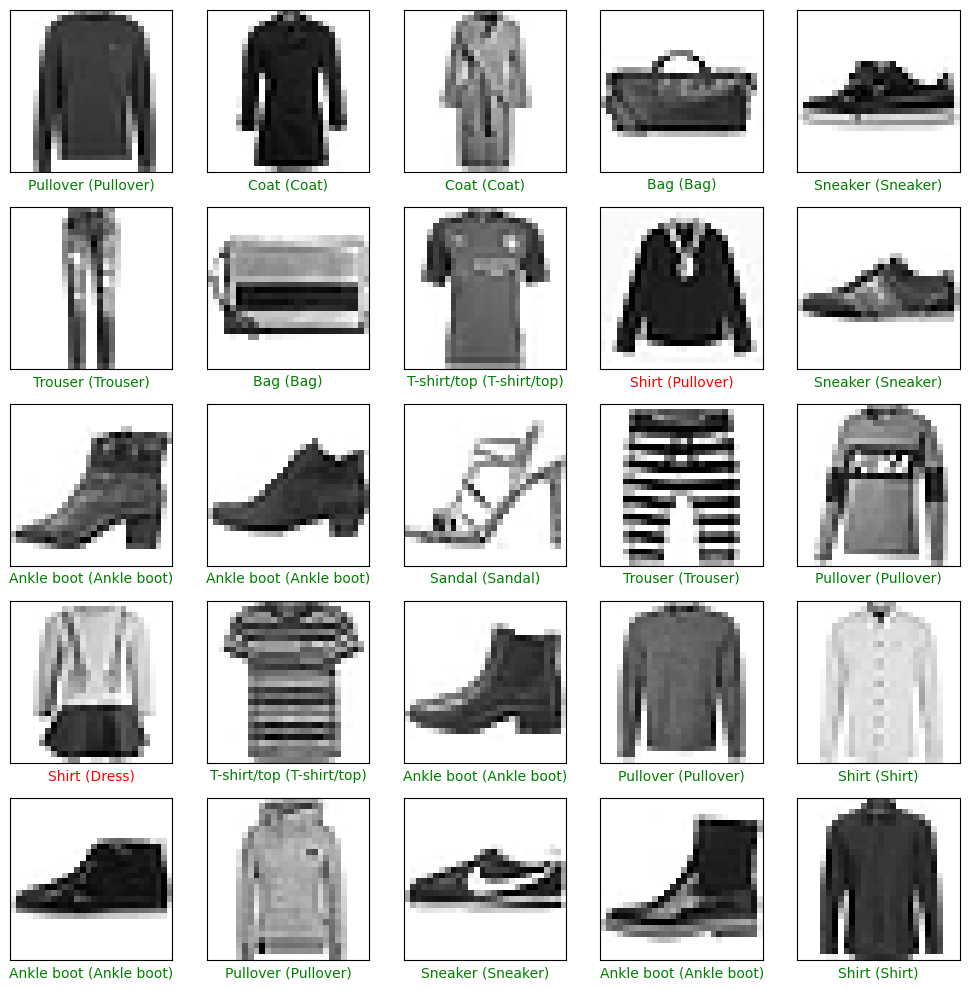

In [11]:
# ‚ÄÉ–í—ñ–∑—É–∞–ª—ñ–∑—É—î–º–æ 25 –≤–∏–ø–∞–¥–∫–æ–≤–∏—Ö –∑–æ–±—Ä–∞–∂–µ–Ω—å —ñ –ø–µ—Ä–µ–¥–±–∞—á–µ–Ω–Ω—è
y_pred = predictions
# ‚ÄÉ–í–∏–≤–µ–¥–µ–Ω–Ω—è —Ç–æ—á–Ω–æ—Å—Ç—ñ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º—É –Ω–∞–±–æ—Ä—ñ
test_loss, test_acc = model.evaluate(x_test_rgb, y_test_cat, verbose=0)
print(f" –¢–µ—Å—Ç–æ–≤–∞ —Ç–æ—á–Ω—ñ—Å—Ç—å: {test_acc:.2%}")

figure = plt.figure(figsize=(10, 10))
indices = np.random.choice(len(x_test), size=25, replace=False)

for i, idx in enumerate(indices):
    ax = figure.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]), cmap=plt.cm.binary)

    pred_idx = np.argmax(y_pred[idx])
    true_idx = y_test[idx]

    ax.set_xlabel(
        f"{class_names[pred_idx]} ({class_names[true_idx]})",
        color=("green" if pred_idx == true_idx else "red"),
    )

plt.tight_layout()
plt.show()

===========================
# 7. –ì—Ä–∞—Ñ—ñ–∫ –Ω–∞–≤—á–∞–Ω–Ω—è
===========================

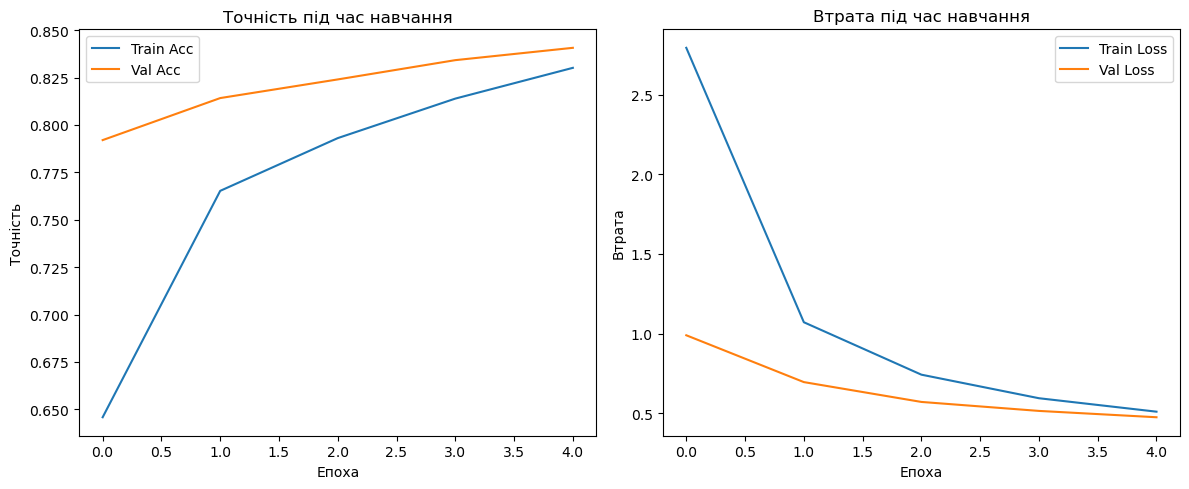

In [12]:
# –ì—Ä–∞—Ñ—ñ–∫–∏ —Ç–æ—á–Ω–æ—Å—Ç—ñ —Ç–∞ –≤—Ç—Ä–∞—Ç–∏
plt.figure(figsize=(12, 5))

# –¢–æ—á–Ω—ñ—Å—Ç—å
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.title("–¢–æ—á–Ω—ñ—Å—Ç—å –ø—ñ–¥ —á–∞—Å –Ω–∞–≤—á–∞–Ω–Ω—è")
plt.xlabel("–ï–ø–æ—Ö–∞")
plt.ylabel("–¢–æ—á–Ω—ñ—Å—Ç—å")
plt.legend()

# –í—Ç—Ä–∞—Ç–∞
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("–í—Ç—Ä–∞—Ç–∞ –ø—ñ–¥ —á–∞—Å –Ω–∞–≤—á–∞–Ω–Ω—è")
plt.xlabel("–ï–ø–æ—Ö–∞")
plt.ylabel("–í—Ç—Ä–∞—Ç–∞")
plt.legend()

plt.tight_layout()
plt.show()

# –ü–æ—Ä—ñ–≤–Ω—è–Ω–Ω—è –º–æ–¥–µ–ª–µ–π –∫–ª–∞—Å–∏—Ñ—ñ–∫–∞—Ü—ñ—ó Fashion-MNIST

---

## ‚úÖ 1. –ë–∞–∑–æ–≤–∞ CNN –∑ –Ω—É–ª—è

**–ê—Ä—Ö—ñ—Ç–µ–∫—Ç—É—Ä–∞:**
- Conv2D + MaxPooling
- Flatten ‚Üí Dense ‚Üí Softmax

**–†–µ–∑—É–ª—å—Ç–∞—Ç–∏:**
- –í–∞–ª—ñ–¥–∞—Ü—ñ–π–Ω–∞ —Ç–æ—á–Ω—ñ—Å—Ç—å: ~87%
- –¢–µ—Å—Ç–æ–≤–∞ —Ç–æ—á–Ω—ñ—Å—Ç—å: ~86‚Äì87%

**–í–∏—Å–Ω–æ–≤–æ–∫:**
- –ë–∞–∑–æ–≤–∏–π —Ä—ñ–≤–µ–Ω—å.
- –ú–æ–¥–µ–ª—å –ø—Ä–æ—Å—Ç–∞ —ñ —Å—Ç–∞–±—ñ–ª—å–Ω–∞, –∞–ª–µ –Ω–µ –≤–∏—Ç—è–≥—É—î —Å–∫–ª–∞–¥–Ω—ñ –∑—Ä–∞–∑–∫–∏.
- –î–æ–±—Ä–µ –¥–ª—è —Å—Ç–∞—Ä—Ç—É, –∞–ª–µ —Ç–æ—á–Ω—ñ—Å—Ç—å –æ–±–º–µ–∂–µ–Ω–∞.

---

## ‚úÖ 2. VGG16 (–ø–µ—Ä–µ–¥–Ω–∞–≤—á–µ–Ω–∞, –∑–∞–º–æ—Ä–æ–∂–µ–Ω–∞)

**–ê—Ä—Ö—ñ—Ç–µ–∫—Ç—É—Ä–∞:**
- VGG16 (`include_top=False`, `trainable=False`)
- GlobalAveragePooling + Dense

**–†–µ–∑—É–ª—å—Ç–∞—Ç–∏:**
- –í–∞–ª—ñ–¥–∞—Ü—ñ–π–Ω–∞ —Ç–æ—á–Ω—ñ—Å—Ç—å: ~88.5%
- –¢–µ—Å—Ç–æ–≤–∞ —Ç–æ—á–Ω—ñ—Å—Ç—å: ~88.3%

**–í–∏—Å–Ω–æ–≤–æ–∫:**
- –Ø–∫—ñ—Å—Ç—å –ø–æ–∫—Ä–∞—â–∏–ª–∞—Å—å –±–µ–∑ –Ω–∞–≤—á–∞–Ω–Ω—è —Å–∞–º–æ—ó VGG.
- –®–≤–∏–¥–∫–µ —Ç—Ä–µ–Ω—É–≤–∞–Ω–Ω—è.
- –ê–ª–µ —Ç–æ—á–Ω—ñ—Å—Ç—å —Å—Ç–∞–±—ñ–ª—ñ–∑—É–≤–∞–ª–∞—Å—å ‚Äî –¥–∞–ª—ñ –Ω–µ —Ä–æ—Å—Ç–µ.

---

## ‚úÖ 3. VGG16 + Fine-Tuning (—Ä–æ–∑–º–æ—Ä–æ–∂–µ–Ω–æ –æ—Å—Ç–∞–Ω–Ω—ñ 4 —à–∞—Ä–∏)

**–ê—Ä—Ö—ñ—Ç–µ–∫—Ç—É—Ä–∞:**
- –¢—ñ —Å–∞–º—ñ —à–∞—Ä–∏ + —Ä–æ–∑–º–æ—Ä–æ–∂–µ–Ω—ñ –æ—Å—Ç–∞–Ω–Ω—ñ 4 —à–∞—Ä–∏ VGG
- Learning rate: `1e-5`

**–†–µ–∑—É–ª—å—Ç–∞—Ç–∏:**
- –í–∞–ª—ñ–¥–∞—Ü—ñ–π–Ω–∞ —Ç–æ—á–Ω—ñ—Å—Ç—å: **92.3%**
- –¢–µ—Å—Ç–æ–≤–∞ —Ç–æ—á–Ω—ñ—Å—Ç—å: **92.05%**
- –ù–∞–π–∫—Ä–∞—â—ñ –∫–ª–∞—Å–∏: `Sandal`, `Bag`, `Ankle boot`
- –°–ª–∞–±—à–∏–π –∫–ª–∞—Å: `Shirt` (~75%)

**–í–∏—Å–Ω–æ–≤–æ–∫:**
- –ù–∞–π–∫—Ä–∞—â–∞ –º–æ–¥–µ–ª—å ‚úÖ
- Fine-tuning –ø–æ–∫—Ä–∞—â–∏–≤ —Ç–æ—á–Ω—ñ—Å—Ç—å –Ω–∞ ~4%
- –ì–∞—Ä–Ω–∞ –≥–µ–Ω–µ—Ä–∞–ª—ñ–∑–∞—Ü—ñ—è, –±–µ–∑ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–Ω—è

---

## üèÜ –í–∏—Å–Ω–æ–≤–æ–∫

> **–ù–∞–π–∫—Ä–∞—â–∞ –º–æ–¥–µ–ª—å ‚Äî VGG16 –∑ Fine-Tuning**  
> ‚úîÔ∏è –ù–∞–π–≤–∏—â–∞ —Ç–æ—á–Ω—ñ—Å—Ç—å  
> ‚úîÔ∏è –ê–¥–∞–ø—Ç–æ–≤–∞–Ω–∞ –¥–æ Fashion-MNIST  
> ‚úîÔ∏è –°—Ç–∞–±—ñ–ª—å–Ω–∞ —ñ —Ç–æ—á–Ω–∞


In [13]:
# –†–æ–∑–º–æ—Ä–æ–∑–∏—Ç–∏ —Ç—ñ–ª—å–∫–∏ —à–∞—Ä–∏ –∑ -8 –ø–æ -4 (–Ω–µ –≤–∫–ª—é—á–∞—é—á–∏ -4)
for layer in base_model.layers:
    layer.trainable = False  # —Å–ø–æ—á–∞—Ç–∫—É –∑–∞–º–æ—Ä–æ–∑–∏—Ç–∏ –≤—Å—ñ

for layer in base_model.layers[-8:-4]:
    layer.trainable = True  # —Ä–æ–∑–º–æ—Ä–æ–∑–∏—Ç–∏ —Ç—ñ–ª—å–∫–∏ —Ü—ñ

# –ü–æ–≤—Ç–æ—Ä–Ω–∞ –∫–æ–º–ø—ñ–ª—è—Ü—ñ—è
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

# –î–æ—Ç—Ä–µ–Ω—É–≤–∞—Ç–∏
model.fit(train_ds, validation_data=val_ds, epochs=10)

# –ó–±–µ—Ä–µ–≥—Ç–∏ –º–æ–¥–µ–ª—å
model.save("vgg16_finetuned_stage2.h5")

Epoch 1/10
844/844 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 370s 438ms/step - accuracy: 0.9694 - loss: 0.0856 - val_accuracy: 0.9112 - val_loss: 0.3006
Epoch 2/10
844/844 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 376s 445ms/step - accuracy: 0.9748 - loss: 0.0713 - val_accuracy: 0.9090 - val_loss: 0.3111
Epoch 3/10
844/844 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 409s 485ms/step - accuracy: 0.9766 - loss: 0.0668 - val_accuracy: 0.9147 - val_loss: 0.3021
Epoch 4/10
844/844 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 352s 417ms/step - accuracy: 0.9802 - loss: 0.0580 - val_accuracy: 0.9178 - val_loss: 0.3090
Epoch 5/10
844/844 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 357s 423ms/step - accuracy: 0.9832 - loss: 0.0508 - val_accuracy: 0.9127 - val_loss: 0.3160
Epoch 6/10
844/844 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 348s 412ms/step - accuracy: 0.9825 - loss: 0.0479 - val_accu

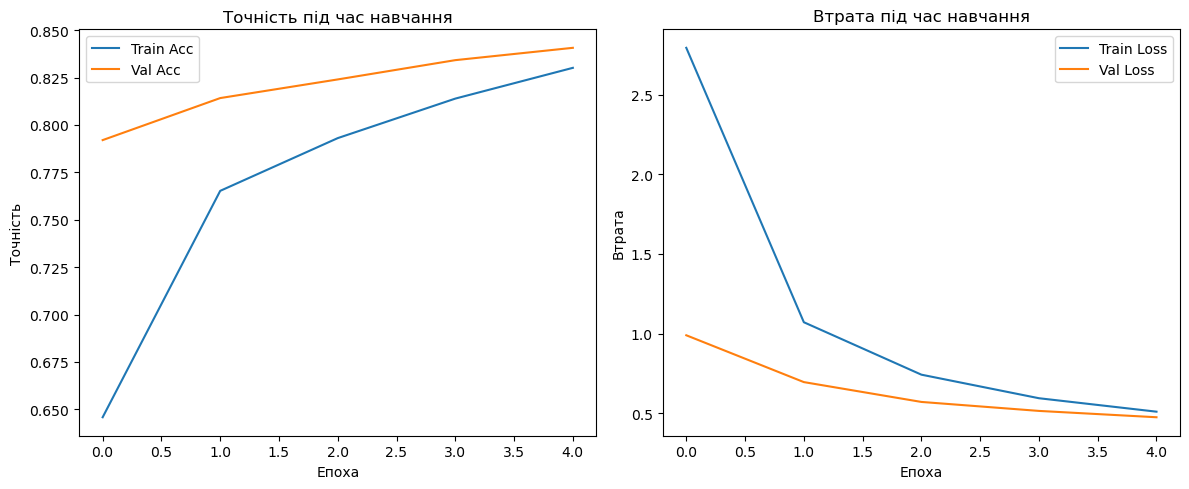

In [14]:
# –ì—Ä–∞—Ñ—ñ–∫–∏ —Ç–æ—á–Ω–æ—Å—Ç—ñ —Ç–∞ –≤—Ç—Ä–∞—Ç–∏
plt.figure(figsize=(12, 5))

# –¢–æ—á–Ω—ñ—Å—Ç—å
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.title("–¢–æ—á–Ω—ñ—Å—Ç—å –ø—ñ–¥ —á–∞—Å –Ω–∞–≤—á–∞–Ω–Ω—è")
plt.xlabel("–ï–ø–æ—Ö–∞")
plt.ylabel("–¢–æ—á–Ω—ñ—Å—Ç—å")
plt.legend()

# –í—Ç—Ä–∞—Ç–∞
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("–í—Ç—Ä–∞—Ç–∞ –ø—ñ–¥ —á–∞—Å –Ω–∞–≤—á–∞–Ω–Ω—è")
plt.xlabel("–ï–ø–æ—Ö–∞")
plt.ylabel("–í—Ç—Ä–∞—Ç–∞")
plt.legend()

plt.tight_layout()
plt.show()

 –¢–µ—Å—Ç–æ–≤–∞ —Ç–æ—á–Ω—ñ—Å—Ç—å: 92.18%


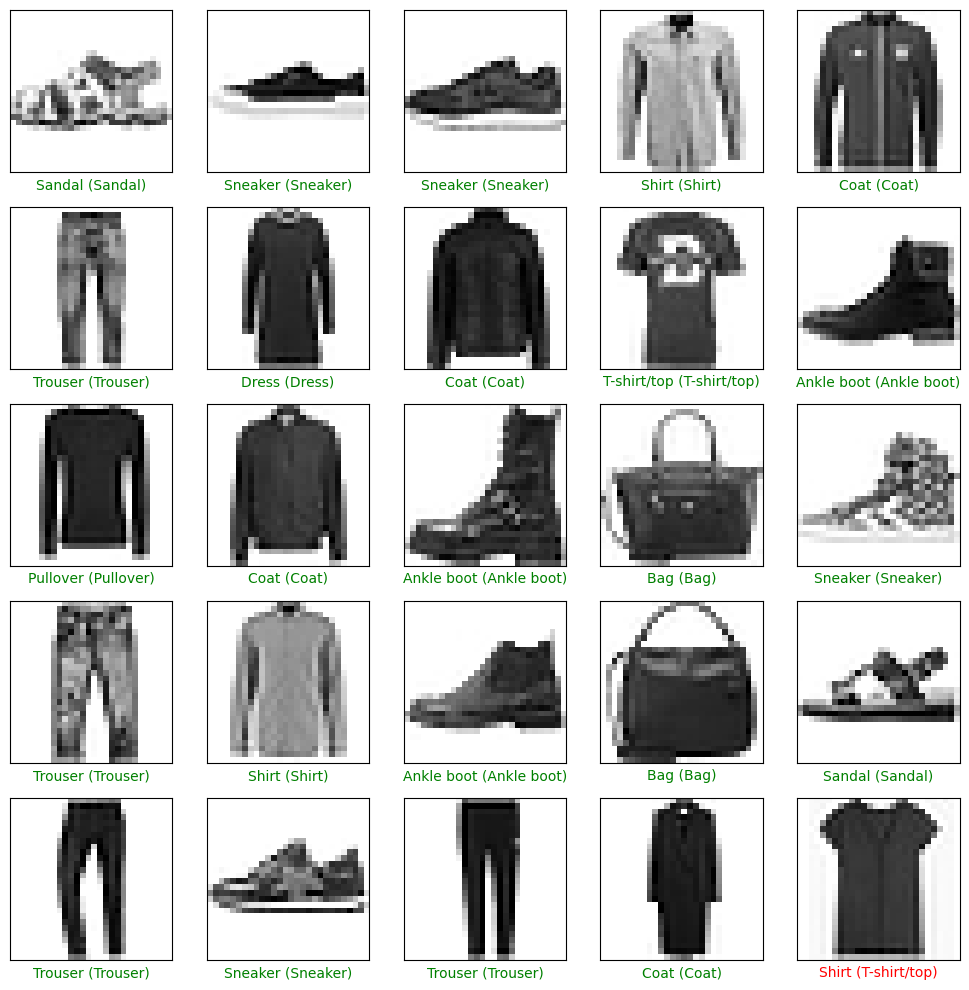

In [16]:
# ‚ÄÉ–í—ñ–∑—É–∞–ª—ñ–∑—É—î–º–æ 25 –≤–∏–ø–∞–¥–∫–æ–≤–∏—Ö –∑–æ–±—Ä–∞–∂–µ–Ω—å —ñ –ø–µ—Ä–µ–¥–±–∞—á–µ–Ω–Ω—è
y_pred = predictions
# ‚ÄÉ–í–∏–≤–µ–¥–µ–Ω–Ω—è —Ç–æ—á–Ω–æ—Å—Ç—ñ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º—É –Ω–∞–±–æ—Ä—ñ
test_loss, test_acc = model.evaluate(x_test_rgb, y_test_cat, verbose=0)
print(f" –¢–µ—Å—Ç–æ–≤–∞ —Ç–æ—á–Ω—ñ—Å—Ç—å: {test_acc:.2%}")

figure = plt.figure(figsize=(10, 10))
indices = np.random.choice(len(x_test), size=25, replace=False)

for i, idx in enumerate(indices):
    ax = figure.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]), cmap=plt.cm.binary)

    pred_idx = np.argmax(y_pred[idx])
    true_idx = y_test[idx]

    ax.set_xlabel(
        f"{class_names[pred_idx]} ({class_names[true_idx]})",
        color=("green" if pred_idx == true_idx else "red"),
    )

plt.tight_layout()
plt.show()